In [1]:
import os, sys
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Netwton formula

$$\pi = 6\sum_{n=0}^{\infty}\frac{(2n)!}{2^{4n+1}(n!)(2n+1)}$$

## Arctan

$$\pi = 4\arctan(1) = 4\sum_{n=0}^{\infty}\frac{(-1)^{n}}{2n+1}$$

In [2]:
def calc_newton(n):
    num = math.factorial(2 * n)
    den = 2 ** (4 * n +1) * (math.factorial(n) **2) * (2 * n + 1)
    return num / den

def calc_arctan(n):
    return (-1) ** n / (2 *n +1)

def output_pi(N):
    return np.array([6 * calc_newton(n) for n in range(N)]).sum()

def output_arctan(N):
    return np.array([4 * calc_arctan(n) for n in range(N)]).sum()

In [3]:
print(math.pi)

3.141592653589793


In [4]:
list_pi = [(N, math.pi - output_pi(N), math.pi - output_arctan(N)) for N in range(100)]

Text(0.5,1,'Convergence of pi')

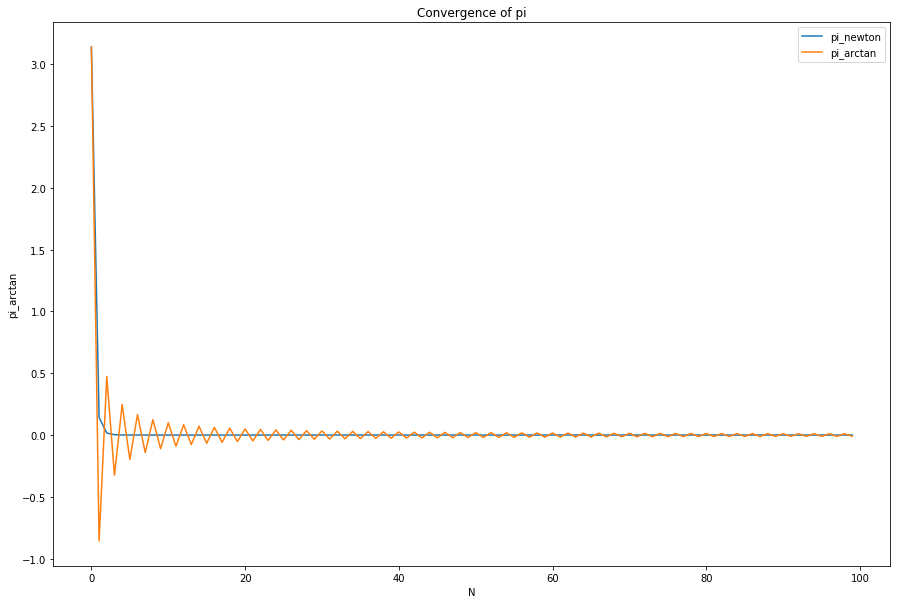

In [5]:
col1 = 'pi_newton'
col2 = 'pi_arctan'

df_newton = pd.DataFrame(list_pi, columns=['N', col1, col2])

fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df_newton, x='N', y=col1, ax=ax, label=col1)
sns.lineplot(data=df_newton, x='N', y=col2, ax=ax, label=col2)

plt.legend()
plt.title('Convergence of pi')